In [ ]:
### Data Description
### a. Customers who left within the last month – the column is called Churn
### b. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, 
###    and streaming TV and movies
### c. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
### d. Demographic info about customers – gender, age range, and if they have partners and dependents

In [ ]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import graphviz


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from matplotlib import  pyplot as palette

df = pd.read_csv("https://raw.githubusercontent.com/theleadio/datascience_demo/master/telco_customer_churn_dataset.csv")

# **1. Obtain data**

In [ ]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4805,2207-RYYRL,Male,0,Yes,Yes,52,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.55,1331.05,No
1862,0523-VNGTF,Female,1,No,No,52,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,50.50,2566.3,No
2266,5732-IKGQH,Male,1,Yes,No,52,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),104.45,5481.25,No
5849,0281-CNTZX,Male,0,Yes,No,63,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.95,1234.8,No
3818,8819-ZBYNA,Female,0,Yes,No,58,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.10,6393.65,No
946,6231-WFGFH,Male,0,Yes,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.50,77.6,No
6820,6300-BWMJX,Female,0,Yes,No,59,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,No,Month-to-month,No,Electronic check,93.35,5386.5,No
4205,6427-FEFIG,Female,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),78.60,1846.65,No
3753,1816-FLZDK,Male,0,No,No,1,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Mailed check,29.15,29.15,No
1560,7338-ERIVA,Male,0,No,Yes,39,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,No,Bank transfer (automatic),45.05,1790.6,No


In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
# Data Explanation
for column in df.columns:
    uniques = sorted(df[column].unique())
    print('{0:20s} {1:5d} \t'.format(column,len(uniques)),uniques[:3]) # ' ' in column TotalCharges

customerID            7043 	 ['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ']
gender                   2 	 ['Female', 'Male']
SeniorCitizen            2 	 [0, 1]
Partner                  2 	 ['No', 'Yes']
Dependents               2 	 ['No', 'Yes']
tenure                  73 	 [0, 1, 2]
PhoneService             2 	 ['No', 'Yes']
MultipleLines            3 	 ['No', 'No phone service', 'Yes']
InternetService          3 	 ['DSL', 'Fiber optic', 'No']
OnlineSecurity           3 	 ['No', 'No internet service', 'Yes']
OnlineBackup             3 	 ['No', 'No internet service', 'Yes']
DeviceProtection         3 	 ['No', 'No internet service', 'Yes']
TechSupport              3 	 ['No', 'No internet service', 'Yes']
StreamingTV              3 	 ['No', 'No internet service', 'Yes']
StreamingMovies          3 	 ['No', 'No internet service', 'Yes']
Contract                 3 	 ['Month-to-month', 'One year', 'Two year']
PaperlessBilling         2 	 ['No', 'Yes']
PaymentMethod            4 	 ['Bank transfer

# **2. Scrub Data**

In [ ]:
# Data Explanation
for column in df.columns:
    uniques = sorted(df[column].unique())
    print('{0:20s} {1:5d} \t'.format(column,len(uniques)),uniques[:3]) # ' ' in column TotalCharges

customerID            7043 	 ['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ']
gender                   2 	 ['Female', 'Male']
SeniorCitizen            2 	 [0, 1]
Partner                  2 	 ['No', 'Yes']
Dependents               2 	 ['No', 'Yes']
tenure                  73 	 [0, 1, 2]
PhoneService             2 	 ['No', 'Yes']
MultipleLines            3 	 ['No', 'No phone service', 'Yes']
InternetService          3 	 ['DSL', 'Fiber optic', 'No']
OnlineSecurity           3 	 ['No', 'No internet service', 'Yes']
OnlineBackup             3 	 ['No', 'No internet service', 'Yes']
DeviceProtection         3 	 ['No', 'No internet service', 'Yes']
TechSupport              3 	 ['No', 'No internet service', 'Yes']
StreamingTV              3 	 ['No', 'No internet service', 'Yes']
StreamingMovies          3 	 ['No', 'No internet service', 'Yes']
Contract                 3 	 ['Month-to-month', 'One year', 'Two year']
PaperlessBilling         2 	 ['No', 'Yes']
PaymentMethod            4 	 ['Bank transfer

In [ ]:
# as TotalCharges is an object data type, thus we convert it to float64 data type using below command
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [ ]:
# to map Yes/No to binary value (1/0)
# we only can map Partner/PhoneService/Dependents/PaperlessBilling/Churn to binary value because all their value is Yes/No
# You can refer to above data explanation

binary_columns = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn" ]

for columns in binary_columns:
   df[columns] = df[columns].map({"No": 0, "Yes": 1})

df['gender'] = df['gender'].map({"Female": 0, "Male": 1})

#alternate way map MultipleLines to binary data as all their value is not Yes/no
df['MultipleLines'].unique()
df['MultipleLines'] = df['MultipleLines'].map({"No": 0, "Yes": 1, "No phone service": 0})

#alternate way map OnlineSecurity to binary data as all their value is not Yes/no
df['OnlineSecurity'] = df['OnlineSecurity'].map({"No": 0, "Yes": 1, "No internet service": 0})
df['OnlineBackup'] = df['OnlineBackup'].map({"No": 0, "Yes": 1, "No internet service": 0})
df['DeviceProtection'] = df['DeviceProtection'].map({"No": 0, "Yes": 1, "No internet service": 0})
df['TechSupport'] = df['TechSupport'].map({"No": 0, "Yes": 1, "No internet service": 0})
df['StreamingTV'] = df['StreamingTV'].map({"No": 0, "Yes": 1, "No internet service": 0})
df['StreamingMovies'] = df['StreamingMovies'].map({"No": 0, "Yes": 1, "No internet service": 0})

#dummy coding
#as InternetService has DSL/Fiber optic/No, so hard to map it to binary data
#so using this method to split it into dummy field (InternetService_DSL/InternetService_Fiber optic/InternetService_No)
df = pd.get_dummies(data=df, columns=['InternetService'])

In [ ]:
# check the data and see any missing value or outlier
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,0.265370,0.343746,0.439585,0.216669
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,0.441561,0.474991,0.496372,0.412004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000


1. look at the count, the highest no. of record is 7043, so i assume the total number of records is 7043.
2. Look at dataset, most of the variables is tally with the total number of records, except the total charges. Look at the no of records is 7032, it should be can drop the missing or invalid value

In [ ]:
#as there is missing value in the total charges, thus we run df = df.dropna() to drop the NA value
df = df.dropna()

In [ ]:
# Data Explanation
for column in df.columns:
    uniques = sorted(df[column].unique())
    print('{0:20s} {1:5d} \t'.format(column,len(uniques)),uniques[:3]) # ' ' in column TotalCharges

customerID            7032 	 ['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ']
gender                   2 	 [0, 1]
SeniorCitizen            2 	 [0, 1]
Partner                  2 	 [0, 1]
Dependents               2 	 [0, 1]
tenure                  72 	 [1, 2, 3]
PhoneService             2 	 [0, 1]
MultipleLines            2 	 [0, 1]
OnlineSecurity           2 	 [0, 1]
OnlineBackup             2 	 [0, 1]
DeviceProtection         2 	 [0, 1]
TechSupport              2 	 [0, 1]
StreamingTV              2 	 [0, 1]
StreamingMovies          2 	 [0, 1]
Contract                 3 	 ['Month-to-month', 'One year', 'Two year']
PaperlessBilling         2 	 [0, 1]
PaymentMethod            4 	 ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check']
MonthlyCharges        1584 	 [18.25, 18.4, 18.55]
TotalCharges          6530 	 [18.8, 18.85, 18.9]
Churn                    2 	 [0, 1]
InternetService_DSL      2 	 [0, 1]
InternetService_Fiber optic     2 	 [0, 1]
InternetService_No       2 	 

#**3. Explore Data**

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0


In [ ]:
## drop unnecessart variable as below

labels = [1,3,4,6,7,8,9,10,11,12,13,14,15,16,17,20]

for i in labels:
    df.iloc[:,i] = LabelEncoder().fit_transform(df.iloc[:,i])

unwantedcolumnlist=["customerID", "PaymentMethod"]
df = df.drop(unwantedcolumnlist, axis=1)
features = df.drop(["Churn"], axis=1).columns

###**Explore Data > Visualization**

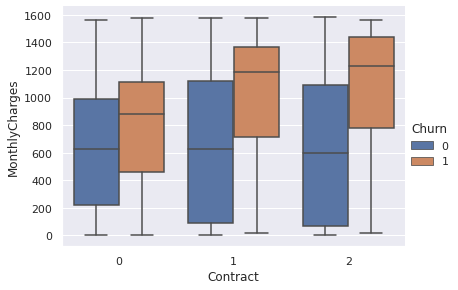

In [ ]:
sns.set(rc={'figure.figsize':(15,11)})
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=df, height=4.2, aspect=1.4)


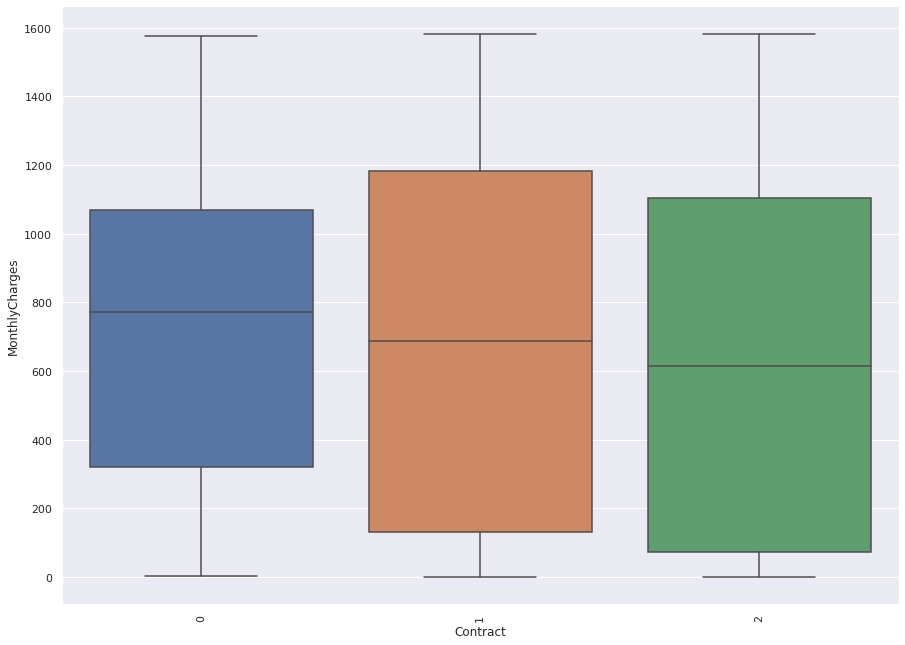

In [ ]:
sns.set(rc={'figure.figsize':(15,11)})
g = sns.boxplot(x="Contract", y="MonthlyCharges", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

From the catplot and boxplot
We can noticed that , most of the person will left, mainly reason is due to the charges.

We also can noticed, people is tended to have one year or 2 year contract.

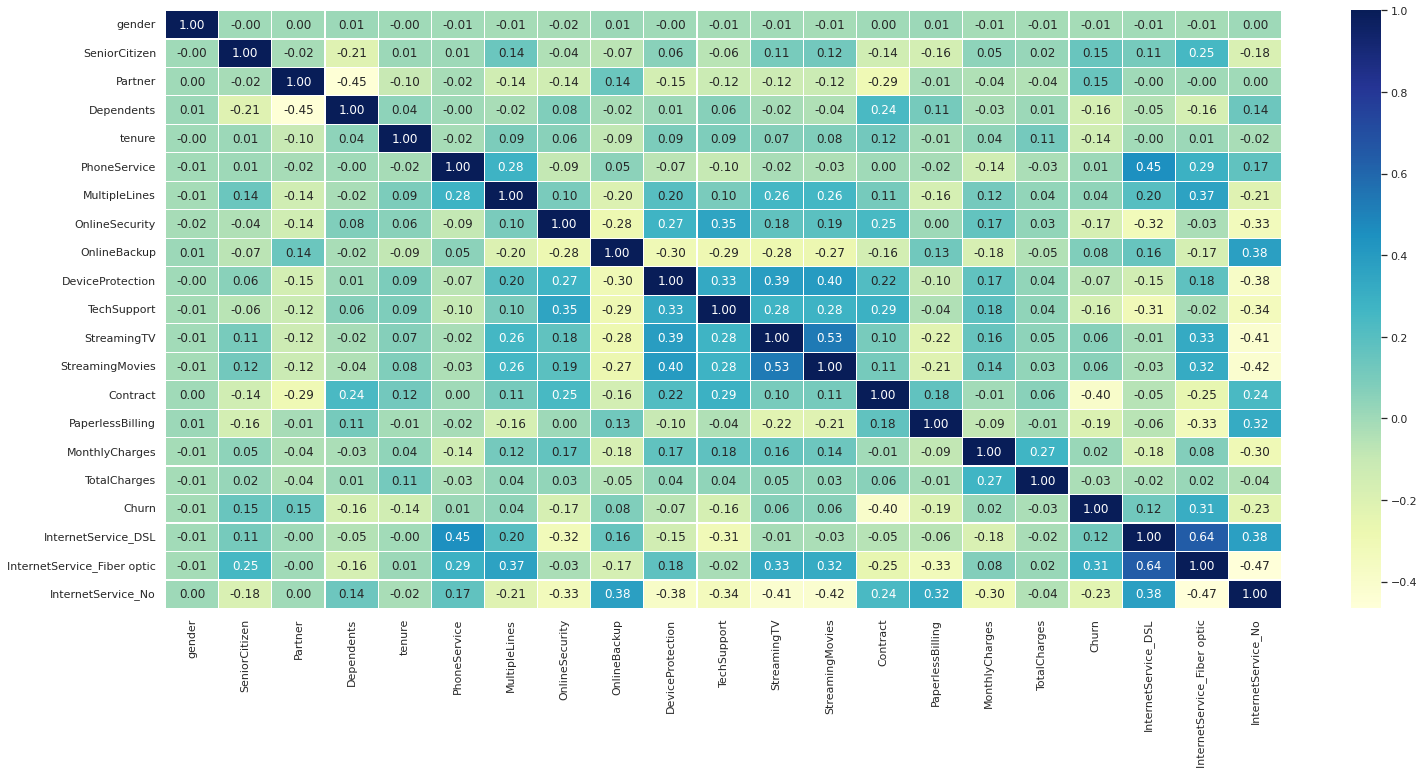

In [ ]:
plt.figure(figsize=(25,11))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu", annot = True, fmt=".2f")

From headmap, 

1. as our target variable is [Churn], thus I focus on variable[churn]. It is postive correlated with variable [SeniorCitizen], [Partner], [InternetService_DSL], and [InternetService_Fiber optic], which mean the rate of churn is relatively depend on this variables.

2. Look at variable [Contract], can conclude the longer contract of customer having subscribed, the rate of churn is low, and vice versa.

3. Look at variable [tenute], can conclude the longer tenure of customer having subscribed, the rate of churn is low, and vice versa



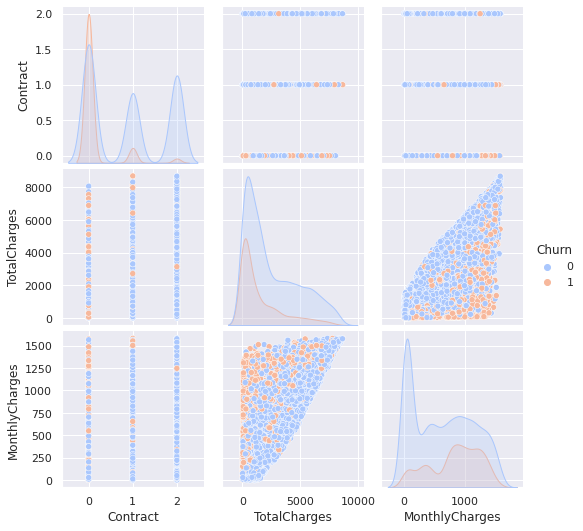

In [ ]:
sub = df[['Contract','TotalCharges','MonthlyCharges','Churn']]
sns.pairplot(sub, hue='Churn', palette='coolwarm')

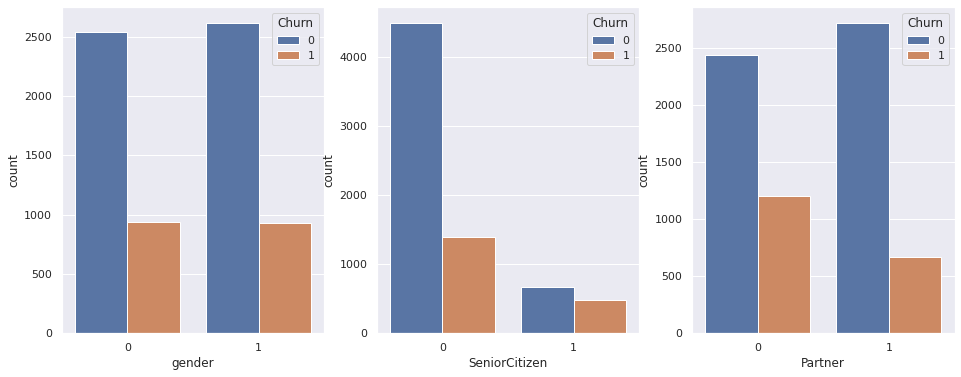

In [ ]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="gender", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="SeniorCitizen", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="Partner", hue="Churn", ax=subplots[2])


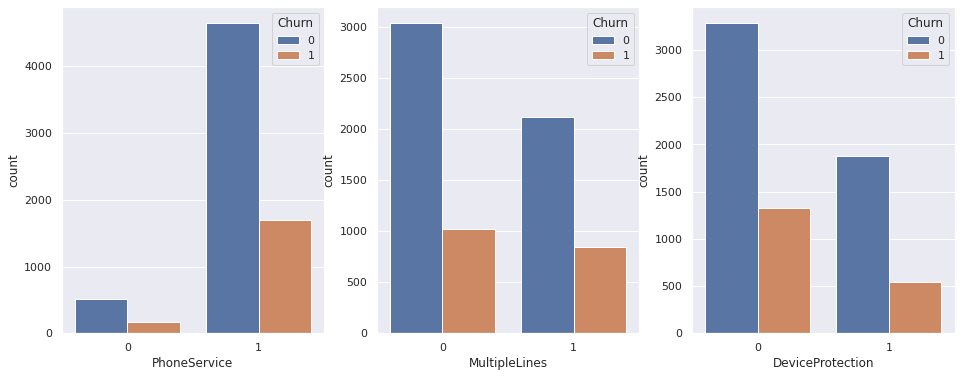

In [ ]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="PhoneService", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="MultipleLines", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="DeviceProtection", hue="Churn", ax=subplots[2])

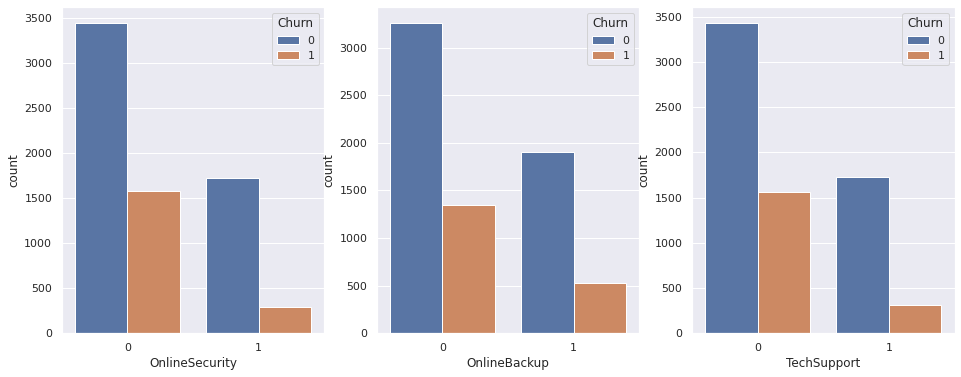

In [ ]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="OnlineSecurity", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="OnlineBackup", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="TechSupport", hue="Churn", ax=subplots[2])

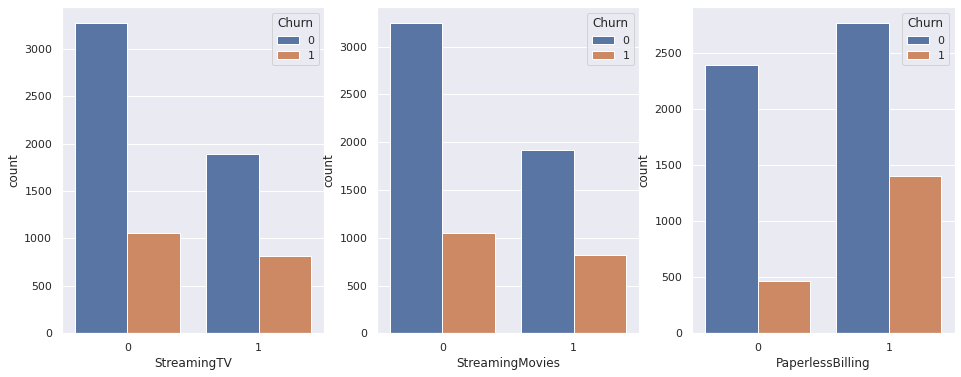

In [ ]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="StreamingTV", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="StreamingMovies", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="PaperlessBilling", hue="Churn", ax=subplots[2])

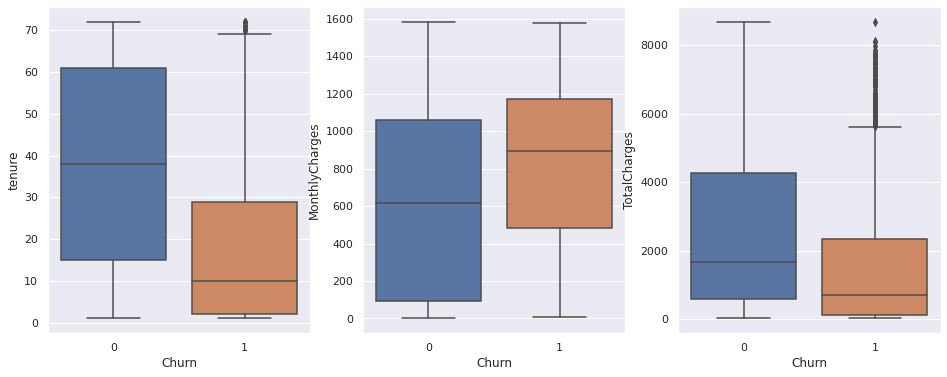

In [ ]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.boxplot(data=df, y="tenure", x="Churn", ax=subplots[0])
sns.boxplot(data=df, y="MonthlyCharges", x="Churn", ax=subplots[1])
sns.boxplot(data=df, y="TotalCharges", x="Churn", ax=subplots[2])

#**4. Modelling**

### **Modelling > Decision Tree**

In [ ]:
columns = ['SeniorCitizen','Partner','PhoneService', 'DeviceProtection', 'OnlineSecurity', 'OnlineBackup','TechSupport','PaperlessBilling','tenure','MonthlyCharges','TotalCharges']



In [ ]:
train_data = df[columns]
train_label = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.3, random_state=1)
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(train_data, train_label)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

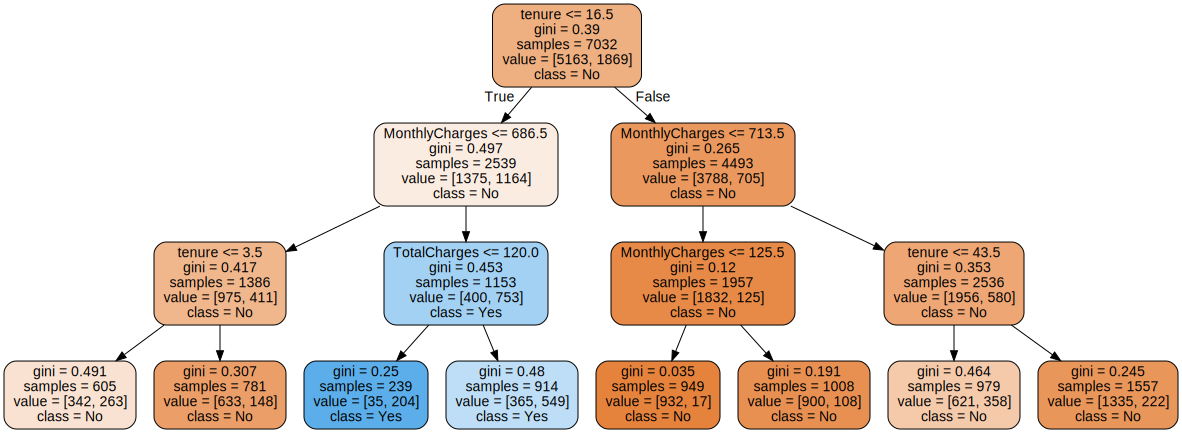

In [ ]:
columns = list(train_data.columns)
dot_data = tree.export_graphviz(model, out_file=None, feature_names=columns, class_names=['No', 'Yes'], filled = True, rounded = True)

graph = graphviz.Source(dot_data)
graph

**Conclusion > Decision Tree**

From the decision tree, we can conclude
1. Shorter tenure and MonthlyCharges > 686.5, the rate of churn is pretty high

In [ ]:
#Show accuracy in percentage
y_pred = model.predict(X_test)
testpred = metrics.accuracy_score(y_test, y_pred)
accuracy = round(testpred *100,2)
print(f"Accuracy: {accuracy}%")

Accuracy: 79.53%


In [ ]:
def fncAppend(arrString):
  df_predict = train_data.iloc[0:0].copy()
  df_predict = df_predict.append(arrString, ignore_index=True)  

  arrReturn = model.predict(df_predict)
  if arrReturn == [0]:
    return "Low"
  else: return "High"

  #return arrReturn
 

### **Modelling > Decision Tree > 1st feature set **

In [ ]:
arrPersonA = { "SeniorCitizen": 0,
    "Partner": 0,    
    "PhoneService": 1,
    "DeviceProtection": 0,
    "OnlineSecurity": 0,
    "OnlineBackup": 0,    
    "TechSupport": 1,
     "tenure": 12,
    "PaperlessBilling": 1,
    "MonthlyCharges":50,
    "TotalCharges":70
   }

print("The chances of churn for Person A is " + fncAppend(arrPersonA))


The chances of churn for Person A is Low


### **Modelling > Decision Tree > 2nd feature set **

In [ ]:
arrPersonB = { "SeniorCitizen": 1,
    "Partner": 0,    
    "PhoneService": 1,
    "DeviceProtection": 0,
    "OnlineSecurity": 0,
    "OnlineBackup": 0,    
    "TechSupport": 0,
     "tenure": 60,
    "PaperlessBilling": 0,
    "MonthlyCharges":30,
    "TotalCharges":50
   }

print("The chances of churn for Person B is " + fncAppend(arrPersonB))


The chances of churn for Person B is Low


### **Modelling > Decision Tree > 3rd feature set **

In [ ]:
arrPersonC = { "SeniorCitizen": 0,
    "Partner": 0,    
    "PhoneService": 1,
    "DeviceProtection": 1,
    "OnlineSecurity":1,
    "OnlineBackup": 1,    
    "TechSupport": 1,
     "tenure": 10,
    "PaperlessBilling": 1,
    "MonthlyCharges":70,
    "TotalCharges":100
   }

print("The chances of churn for Person C is " + fncAppend(arrPersonC))

The chances of churn for Person C is Low


### **Modelling > Decision Tree > 4th feature set **

In [ ]:
arrPersonD = { "SeniorCitizen": 0,
    "Partner": 0,    
    "PhoneService": 1,
    "DeviceProtection": 0,
    "OnlineSecurity":0,
    "OnlineBackup": 0,    
    "TechSupport": 0,
     "tenure": 10,
    "PaperlessBilling": 1,
    "MonthlyCharges":700,
    "TotalCharges":770
   }

print("The chances of churn for Person D is " + fncAppend(arrPersonD))

The chances of churn for Person D is High


### **Modelling > Decision Tree > 5th feature set **

In [ ]:
arrPersonE = { "SeniorCitizen": 0,
    "Partner": 0,    
    "PhoneService": 1,
    "DeviceProtection": 0,
    "OnlineSecurity":0,
    "OnlineBackup": 0,    
    "TechSupport": 0,
     "tenure": 60,
    "PaperlessBilling": 1,
    "MonthlyCharges":700,
    "TotalCharges":770
   }

print("The chances of churn for Person E is " + fncAppend(arrPersonE))

The chances of churn for Person E is Low


#**5. Interpret**

As conclusion, according to the decision and test sets, shorter tenure and high MonthlyCharges e.g. > 686.5, the rate of churn is high